<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EB%AC%B4%EC%8A%A8%EC%9D%BC%EC%9D%B4%EC%A1%B0_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 먼저 읽어주세요!

이번 실습에서 사용한 데이터는 저번에 CBR, AR했던 데이터였는데 그때는 사용된 변수들이 본 실습 목적에 맞지 않는다고 했었습니다. 그래서 이번에는 똑같은 분류 문제이기도 하고 종협님 의견대로 같은 데이터 사용해도 된다고하기도 했고, 로지스틱 분류문제에서 다양한 변수들이 들어갈 수 있기 때문에 이와 같은 데이터를 활용해도 좋을 것 같습니다.

저번에 연준님이 보내주신 그 혈압혈당데이터 입니다. 이번에는 **고혈압이냐? -1**, **당뇨냐?-2** 가 타겟변수(Y)가 될 것입니다. 그리고 각각의 독립변수(나이, 성별, 혈당, BMI지수 등)에 따른 고혈압이냐 당뇨냐를 분류하는것을 목적으로 하겠습니다.

---

## Help 라고 적힌 부분에 대한 해석을 도와주세요!

오즈비의 경우 교차오즈비를 사용하였고, 로짓모형에 따른 오즈비 역시 사용하였습니다. 결과는 같고 해석하는 방법은 제가 주석으로 달아놓겠습니다.

---

## 이번 실습의 방향

오즈비를 해석하시다보면 20대가 70대 노인보다 당뇨에 걸릴 위험이 높다는 것을 알 수 있습니다. 반면에 70대 노인들은 당뇨보다는 고혈압에 더 취약한 모습을 보입니다. 그런데 이것을 자칫, **20대는 70대보다 당뇨에 잘 걸리는 구나** 라고 해석하는 것은 다소 무리가 있습니다. 그 이유로는 이 데이터셋 자체가 애초에 당뇨, 고혈압을 진단받은 데이터셋으로만 이루어져 있었기 때문에 이 데이터를 수집한 곳에서 20대애들이 당뇨에 많이 걸렸을 뿐이지 대한민국 20대 애들에 대한 대표적인 사례가 되기란 어렵다는 것입니다.

**그렇다면 20대 애들이 70대보다 당뇨의 위험이 높다고 할 수는 없느냐?**
하면 그것은 또 아닙니다. 실제로 뉴스기사 https://www.akomnews.com/bbs/board.php?bo_table=news&wr_id=41698 에 따르면, 20대의 당뇨 비율이 높아졌음을 알 수 있는데 다만, 이것은 20대 내에서의 결과가 그렇다는 것이지 70대에 비해서 라고 비교를 하는것은 다소 무리가 있다는 것 뿐입니다.

**이렇게 제가 설명을 드리는 이유는** 위 데이터셋이 **당뇨에 걸린사람 vs 안걸린 사람, 고혈압에 걸린사람 vs 고혈압에 안걸린 사람** 이런식의 데이터가 아니라서 조교님이 평가하실 때 혹시나 감점사항으로 생각하실 까봐 미리 방어차원에서 말씀드리는 겁니다.

**결론적으로는** 해석에 있어서 **이 데이터 내에서는**이라는 워딩이 중요하다고 생각합니다.(이 데이터 내에서는 or 당뇨 혹은 고혈압 환자들 데이터를 기준으로 봤을때는) 

이것은 Team Review같은 부분을 작성할때 아쉬웠던 점으로 작성할수도 있을 것 같습니다.(걸린 사람 vs 안걸린 사람 데이터였으면 더 정확했을 것이다. 등)

---
## 채점기준
1. Apply a logistic regression to the data of your interest.

2. Interpret the result.

채점 기준 (상, 중상, 중, 중하, 하)

1. 타겟변수에 대한 명확한 정의와 구하고자는 class의확률에 대해 명시하였는지

2. maximum likelihood 의미를서술하였는지

3. 결과해석 - 변수해석, odds ratio (승산비) 해석

4. misclassification rate를 포함한 다양한 성능지표의 해석 및 ROC 커브해석 (민감도, 특이도)

 * cut-off value값도 0.5 이외에 다른 값들도 해보시길 바랍니다.

# ***(Help)RQ랑 팀이름, 학번, 이름, 서론(당뇨랑 고혈압의 위험이 높아지고 있어서 분석해보고 싶었다 등), 데이터 변수 설명(명확한 정의) -- DIS 변수 1,2,3,4 중에서 3, 4만 쓸거고 왜 3,4만 썼는지( 고혈압 당뇨), 활용목적 쓰기***

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import sklearn
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,recall_score,f1_score,accuracy_score,precision_score,precision_recall_curve,roc_auc_score,confusion_matrix

In [152]:
df=pd.read_csv('./국가건강검진_혈압혈당데이터.csv')
df

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
0,1,1,116,78,94,4,16.6
1,1,1,100,60,79,4,22.3
2,1,1,100,60,87,4,21.9
3,1,1,111,70,72,4,20.2
4,1,1,120,80,98,4,20.0
...,...,...,...,...,...,...,...
999995,2,27,120,70,81,2,23.1
999996,2,27,110,70,104,2,27.2
999997,2,27,115,53,110,1,25.2
999998,2,27,120,70,90,2,19.7


In [153]:
df.shape

(1000000, 7)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1000000 non-null  int64  
 1   BTH_G   1000000 non-null  int64  
 2   SBP     1000000 non-null  int64  
 3   DBP     1000000 non-null  int64  
 4   FBS     1000000 non-null  int64  
 5   DIS     1000000 non-null  int64  
 6   BMI     1000000 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 53.4 MB


In [155]:
df.describe()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.489773,13.905268,121.871763,75.787874,98.864428,3.471040,23.804029
std,0.499896,7.006442,14.561706,9.793411,22.981300,0.946151,3.297287
min,1.000000,1.000000,82.000000,50.000000,60.000000,1.000000,14.800000
25%,1.000000,9.000000,110.000000,70.000000,87.000000,3.000000,21.500000
50%,1.000000,14.000000,120.000000,76.000000,94.000000,4.000000,23.600000
75%,2.000000,19.000000,130.000000,80.000000,104.000000,4.000000,25.800000
max,2.000000,27.000000,190.000000,120.000000,358.000000,4.000000,40.300000


In [156]:
df.isnull().sum()

SEX      0
BTH_G    0
SBP      0
DBP      0
FBS      0
DIS      0
BMI      0
dtype: int64

In [157]:
df['DIS']=df['DIS'].replace(2,0)
df['DIS']=df['DIS'].replace(3,1)

In [158]:
df=df[(df['DIS'] == 0) | (df['DIS'] == 1)]
df=df.reset_index()
df=df.drop(['index'],axis=1)
df

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
0,1,1,90,50,86,0,20.1
1,1,1,120,80,90,1,27.0
2,1,1,100,60,112,0,31.8
3,1,1,170,120,86,0,23.3
4,1,1,135,80,104,0,35.0
...,...,...,...,...,...,...,...
259333,2,27,126,70,123,1,25.2
259334,2,27,120,70,81,0,23.1
259335,2,27,110,70,104,0,27.2
259336,2,27,115,53,110,1,25.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


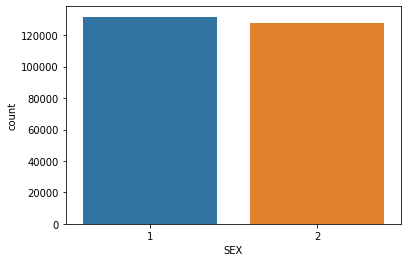

In [159]:
sns.countplot(df['SEX'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


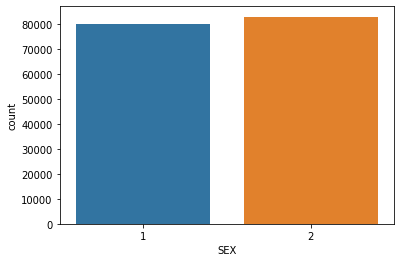

In [160]:
sns.countplot(df[df['DIS'] == 0]['SEX'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


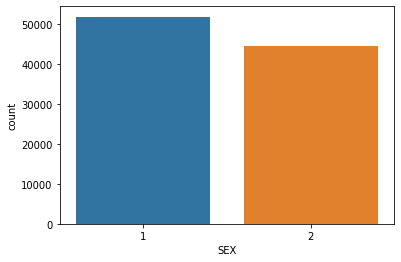

In [161]:
sns.countplot(df[df['DIS'] == 1]['SEX'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


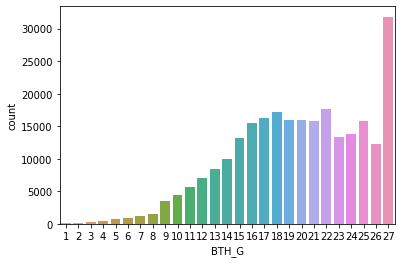

In [162]:
sns.countplot(df['BTH_G'])

In [163]:
for ag,ind in zip(df['BTH_G'], df.index):
  if ag < 5:
    df['BTH_G'].loc[ind]=2
  elif ag < 10:
    df['BTH_G'].loc[ind]=3
  elif ag < 15:
    df['BTH_G'].loc[ind]=4
  elif ag < 20:
    df['BTH_G'].loc[ind]=5
  elif ag < 25:
    df['BTH_G'].loc[ind]=6
  else:
    df['BTH_G'].loc[ind]=7
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
0,1,2,90,50,86,0,20.1
1,1,2,120,80,90,1,27.0
2,1,2,100,60,112,0,31.8
3,1,2,170,120,86,0,23.3
4,1,2,135,80,104,0,35.0
...,...,...,...,...,...,...,...
259333,2,7,126,70,123,1,25.2
259334,2,7,120,70,81,0,23.1
259335,2,7,110,70,104,0,27.2
259336,2,7,115,53,110,1,25.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


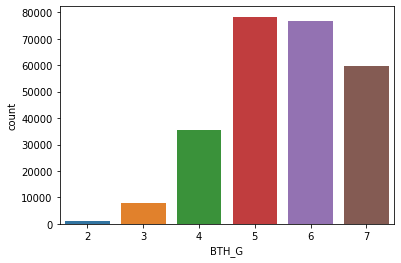

In [164]:
sns.countplot(df['BTH_G'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


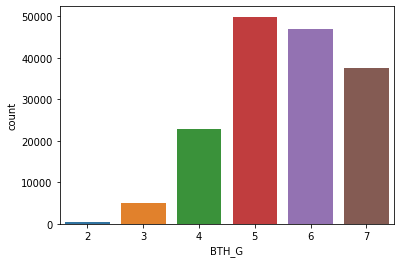

In [165]:
sns.countplot(df[df['DIS'] == 0]['BTH_G'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


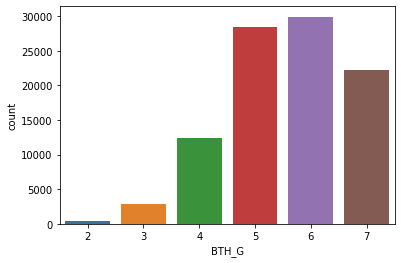

In [166]:
sns.countplot(df[df['DIS'] == 1]['BTH_G'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


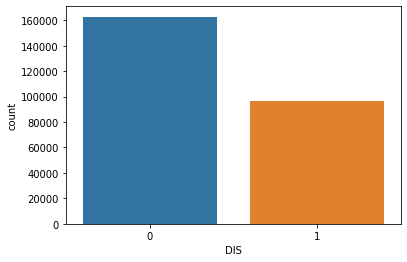

In [167]:
sns.countplot(df['DIS'])

# (Help) 카이제곱검정 해석(p-value가 0.05 이하 이므로 귀무가설 기각, a 변수와 DIS는 관계가 있다.

In [168]:
chi_data=pd.crosstab(index=df.SEX, columns=df.DIS,values=df.DIS, aggfunc=pd.value_counts )
chi, p, dof, expected = chi2_contingency(chi_data)

print()
print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{chi_data}", sep = "\n" )


chi 스퀘어 값: 532.6563260401686
p-value (0.05): 7.465405398361976e-118
자유도 수: 1
기대값: 
              0             1
0  82732.745861  49038.254139
1  80093.254139  47473.745861
측정값: 
DIS      0      1
SEX              
1    79892  51879
2    82934  44633


# chi_data에 대한 해석은 안하셔도 됩니다.

chi_data라는 테이블에 대한 해석 필요 x

In [169]:
chi_data.columns=['고혈압','당뇨']
chi_data

,고혈압,당뇨
SEX,,
1,79892,51879
2,82934,44633


# (Help)오즈비에 대한 해석

아래 보이시는 것은 교차오즈비 입니다.

교차오즈비는 상대적 위험을 나타내는 측도개념으로 생각하시면 되는데, 이 칸 바로위에 SEX,고혈압,당뇨에 관한 데이터 테이블을 보시면 남자(1)가 고혈압이 79,892명이고 여자(2)가 고혈압이 82,934명입니다. 이때 이것들을 교차오즈비를 통해 구해주면 아래처럼 0.8287721~과 같은 값이 나오는데 이는 **남자(1)가 여자(2)보다 고혈압에 노출될 확률이 상대적으로 약 18% 낮다.**를 의미 합니다. 바꿔 말하자면, 여자의 경우 남자보다 고혈압에 걸릴 확률이 높다고 볼 수 있겠네요.

또한, 이 교차오즈비에서 행 or 열의 배열을 바꿔주게 되면 교차오즈비 값의 역이 됩니다. 아래 보시는 것과 같이 1.20660421~ 값이 0.82877217~이라는 값의 역이 되는데 이를 열의 배열을 바꿔주었다 생각한다면 **남자가 여자보다 당뇨에 노출될 확률이 상대적으로 20% 높다.**라고 해석할 수 있습니다. 이것 또한, 바꿔 말하자면 남자의 경우 여자보다 당뇨에 걸릴 확률이 높다고 볼 수 있겠습니다. 모두 건강조심!

In [170]:
print((chi_data['고혈압'][1]*chi_data['당뇨'][2])/(chi_data['고혈압'][2]*chi_data['당뇨'][1]))
print(1/((chi_data['고혈압'][1]*chi_data['당뇨'][2])/(chi_data['고혈압'][2]*chi_data['당뇨'][1])))

0.828772178528976
1.2066042103089702


# Help

In [171]:
chi_data=pd.crosstab(index=df.BTH_G, columns=df.DIS,values=df.DIS, aggfunc=pd.value_counts )
chi, p, dof, expected = chi2_contingency(chi_data)

print()
print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{chi_data}", sep = "\n" )


chi 스퀘어 값: 218.61347599762328
p-value (0.05): 2.944198315904106e-45
자유도 수: 5
기대값: 
              0             1
0    640.409504    379.590496
1   4992.054870   2958.945130
2  22185.794353  13150.205647
3  49187.844890  29155.155110
4  48236.020568  28590.979432
5  37583.875815  22277.124185
측정값: 
DIS        0      1
BTH_G              
2        553    467
3       5033   2918
4      22896  12440
5      49866  28477
6      46900  29927
7      37578  22283


In [172]:
chi_data.columns=['고혈압','당뇨']
chi_data

,고혈압,당뇨
BTH_G,,
2,553,467
3,5033,2918
4,22896,12440
5,49866,28477
6,46900,29927
7,37578,22283


# Help

이것 또한 위에 설명드린 것처럼 해석하시면 되는데 지금 보시는 값은 20대 vs 30대, 40대, 50대, 60대, 70대의 교차오즈비를 구해놓은 것 입니다.

다시 말해서, 20대와 30대를 비교했을때는 0.68654120492값이 나왔는데 이는 **20대의 경우 30대보다 고혈압에 노출될 상대적 위험이 32% 낮다.**라고 볼 수 있겠습니다. 마찬가지로 20대와 70대를 비교했을 때 0.702179666~ 값이 나왔는데 이는 **20대의 경우 70대보다 고혈압에 노출될 상대적 위험이 30% 낮다.**라고 볼 수 있겠습니다.

결론적으로 봤을때 20대는 전 연령에 비해서 고혈압에 걸릴 확률이 지극히 낮아보입니다.(적어도 위 데이터셋 에서는)

In [173]:
print((chi_data['고혈압'][2]*chi_data['당뇨'][3])/(chi_data['고혈압'][3]*chi_data['당뇨'][2]))
print((chi_data['고혈압'][2]*chi_data['당뇨'][4])/(chi_data['고혈압'][4]*chi_data['당뇨'][2]))
print((chi_data['고혈압'][2]*chi_data['당뇨'][5])/(chi_data['고혈압'][5]*chi_data['당뇨'][2]))
print((chi_data['고혈압'][2]*chi_data['당뇨'][6])/(chi_data['고혈압'][6]*chi_data['당뇨'][2]))
print((chi_data['고혈압'][2]*chi_data['당뇨'][7])/(chi_data['고혈압'][7]*chi_data['당뇨'][2]))

0.6865412049211819
0.6433821603915741
0.6762354802519575
0.7556115567771421
0.7021796661516494


# Help

반면에 당뇨는 20대가 위험한 모습을 보이네요.. 20대와 30대를 비교했을때 약 45%가 높게 나왔습니다. 아무튼 이런식으로 해석을 적어주시면 감사하겠습니다.

In [174]:
print(1/((chi_data['고혈압'][2]*chi_data['당뇨'][3])/(chi_data['고혈압'][3]*chi_data['당뇨'][2])))
print(1/((chi_data['고혈압'][2]*chi_data['당뇨'][4])/(chi_data['고혈압'][4]*chi_data['당뇨'][2])))
print(1/((chi_data['고혈압'][2]*chi_data['당뇨'][5])/(chi_data['고혈압'][5]*chi_data['당뇨'][2])))
print(1/((chi_data['고혈압'][2]*chi_data['당뇨'][6])/(chi_data['고혈압'][6]*chi_data['당뇨'][2])))
print(1/((chi_data['고혈압'][2]*chi_data['당뇨'][7])/(chi_data['고혈압'][7]*chi_data['당뇨'][2])))

1.4565768126252592
1.5542861794479688
1.4787748191316605
1.3234313200094916
1.424136938457045


# Help

30~40,50,60,70 (고혈압에 대한것)

In [175]:
print((chi_data['고혈압'][3]*chi_data['당뇨'][4])/(chi_data['고혈압'][4]*chi_data['당뇨'][3]))
print((chi_data['고혈압'][3]*chi_data['당뇨'][5])/(chi_data['고혈압'][5]*chi_data['당뇨'][3]))
print((chi_data['고혈압'][3]*chi_data['당뇨'][6])/(chi_data['고혈압'][6]*chi_data['당뇨'][3]))
print((chi_data['고혈압'][3]*chi_data['당뇨'][7])/(chi_data['고혈압'][7]*chi_data['당뇨'][3]))

0.9371355364831123
0.9849889204095076
1.1006062729532597
1.0227786200134381


# Help

30~40,50,60,70(당뇨에 대한것)

In [176]:
print(1/((chi_data['고혈압'][3]*chi_data['당뇨'][4])/(chi_data['고혈압'][4]*chi_data['당뇨'][3])))
print(1/((chi_data['고혈압'][3]*chi_data['당뇨'][5])/(chi_data['고혈압'][5]*chi_data['당뇨'][3])))
print(1/((chi_data['고혈압'][3]*chi_data['당뇨'][6])/(chi_data['고혈압'][6]*chi_data['당뇨'][3])))
print(1/((chi_data['고혈압'][3]*chi_data['당뇨'][7])/(chi_data['고혈압'][7]*chi_data['당뇨'][3])))

1.0670815064305488
1.015239846133753
0.9085901330697465
0.9777286897010627


# Help
40기준 고혈압

In [177]:
print((chi_data['고혈압'][4]*chi_data['당뇨'][5])/(chi_data['고혈압'][5]*chi_data['당뇨'][4]))
print((chi_data['고혈압'][4]*chi_data['당뇨'][6])/(chi_data['고혈압'][6]*chi_data['당뇨'][4]))
print((chi_data['고혈압'][4]*chi_data['당뇨'][7])/(chi_data['고혈압'][7]*chi_data['당뇨'][4]))

1.0510634610079772
1.174436599729876
1.0913881505888974


# Help
40기준 당뇨

In [178]:
print(1/((chi_data['고혈압'][4]*chi_data['당뇨'][5])/(chi_data['고혈압'][5]*chi_data['당뇨'][4])))
print(1/((chi_data['고혈압'][4]*chi_data['당뇨'][6])/(chi_data['고혈압'][6]*chi_data['당뇨'][4])))
print(1/((chi_data['고혈압'][4]*chi_data['당뇨'][7])/(chi_data['고혈압'][7]*chi_data['당뇨'][4])))

0.9514173378655871
0.8514721017975794
0.9162643001579359


# Help
50기준 고혈압

In [179]:
print((chi_data['고혈압'][5]*chi_data['당뇨'][6])/(chi_data['고혈압'][6]*chi_data['당뇨'][5]))
print((chi_data['고혈압'][5]*chi_data['당뇨'][7])/(chi_data['고혈압'][7]*chi_data['당뇨'][5]))

1.1173793432069108
1.038365608811335


# Help
50기준 당뇨

In [180]:
print(1/((chi_data['고혈압'][5]*chi_data['당뇨'][6])/(chi_data['고혈압'][6]*chi_data['당뇨'][5])))
print(1/((chi_data['고혈압'][5]*chi_data['당뇨'][7])/(chi_data['고혈압'][7]*chi_data['당뇨'][5])))

0.8949512142671004
0.9630519265220523


# Help
60기준 고혈압

In [181]:
print((chi_data['고혈압'][6]*chi_data['당뇨'][7])/(chi_data['고혈압'][7]*chi_data['당뇨'][6]))

0.9292865624589014


# Help
60기준 당뇨

In [182]:
print(1/((chi_data['고혈압'][6]*chi_data['당뇨'][7])/(chi_data['고혈압'][7]*chi_data['당뇨'][6])))

1.076094329131361


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


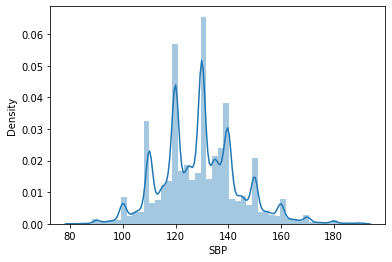

In [183]:
sns.distplot(df['SBP'])

In [184]:
logit = sm.Logit(df['DIS'],df['SBP']).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.657429
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    DIS   No. Observations:               259338
Model:                          Logit   Df Residuals:                   259337
Method:                           MLE   Df Model:                            0
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                0.004029
Time:                        08:42:57   Log-Likelihood:            -1.7050e+05
converged:                       True   LL-Null:                   -1.7119e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SBP           -0.0042   3.13e-05   -133.509      0.000      -0.004      -0.004
==============================================================================
"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


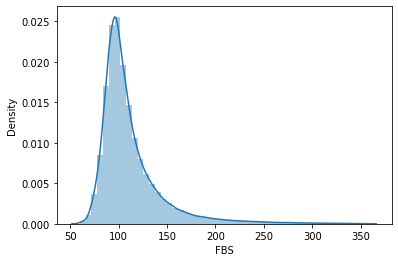

In [185]:
sns.distplot(df['FBS'])

In [186]:
logit = sm.Logit(df['DIS'],df['FBS']).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.686618
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    DIS   No. Observations:               259338
Model:                          Logit   Df Residuals:                   259337
Method:                           MLE   Df Model:                            0
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                -0.04019
Time:                        08:43:01   Log-Likelihood:            -1.7807e+05
converged:                       True   LL-Null:                   -1.7119e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FBS           -0.0020    3.4e-05    -57.891      0.000      -0.002      -0.002
==============================================================================
"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


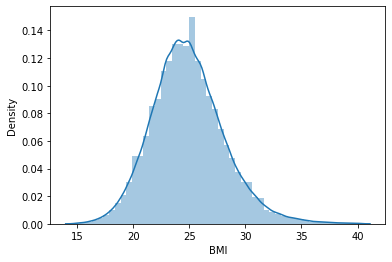

In [187]:
sns.distplot(df['BMI'])

In [188]:
logit = sm.Logit(df['DIS'],df['BMI']).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.660292
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    DIS   No. Observations:               259338
Model:                          Logit   Df Residuals:                   259337
Method:                           MLE   Df Model:                            0
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:              -0.0003073
Time:                        08:43:05   Log-Likelihood:            -1.7124e+05
converged:                       True   LL-Null:                   -1.7119e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
BMI           -0.0208      0.000   -128.218      0.000      -0.021      -0.020
==============================================================================
"""

In [189]:
scaler=StandardScaler()
scale=scaler.fit_transform(df[['SBP','DBP','FBS','BMI']])
scale=pd.DataFrame(scale)
scale.columns=['SBP','DBP','FBS','BMI']
scale

,SBP,DBP,FBS,BMI
0,-2.636517,-2.897507,-0.772884,-1.477255
1,-0.626573,0.102945,-0.653249,0.650729
2,-1.966535,-1.897356,0.004748,2.131066
3,2.723334,4.103548,-0.772884,-0.490364
4,0.378400,0.102945,-0.234524,3.117958
...,...,...,...,...
259333,-0.224584,-0.897205,0.333746,0.095603
259334,-0.626573,-0.897205,-0.922429,-0.552044
259335,-1.296554,-0.897205,-0.234524,0.712410
259336,-0.961563,-2.597461,-0.055070,0.095603


In [190]:
df['SBP']=scale['SBP']
df['DBP']=scale['DBP']
df['FBS']=scale['FBS']
df['BMI']=scale['BMI']
df

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
0,1,2,-2.636517,-2.897507,-0.772884,0,-1.477255
1,1,2,-0.626573,0.102945,-0.653249,1,0.650729
2,1,2,-1.966535,-1.897356,0.004748,0,2.131066
3,1,2,2.723334,4.103548,-0.772884,0,-0.490364
4,1,2,0.378400,0.102945,-0.234524,0,3.117958
...,...,...,...,...,...,...,...
259333,2,7,-0.224584,-0.897205,0.333746,1,0.095603
259334,2,7,-0.626573,-0.897205,-0.922429,0,-0.552044
259335,2,7,-1.296554,-0.897205,-0.234524,0,0.712410
259336,2,7,-0.961563,-2.597461,-0.055070,1,0.095603


In [206]:
df['SEX']=df['SEX'].replace(1,0)
df['SEX']=df['SEX'].replace(2,1)
df

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
0,0,2,-2.636517,-2.897507,-0.772884,0,-1.477255
1,0,2,-0.626573,0.102945,-0.653249,1,0.650729
2,0,2,-1.966535,-1.897356,0.004748,0,2.131066
3,0,2,2.723334,4.103548,-0.772884,0,-0.490364
4,0,2,0.378400,0.102945,-0.234524,0,3.117958
...,...,...,...,...,...,...,...
259333,1,7,-0.224584,-0.897205,0.333746,1,0.095603
259334,1,7,-0.626573,-0.897205,-0.922429,0,-0.552044
259335,1,7,-1.296554,-0.897205,-0.234524,0,0.712410
259336,1,7,-0.961563,-2.597461,-0.055070,1,0.095603


In [191]:
df[['SBP','DBP','FBS','BMI']].describe()

,SBP,DBP,FBS,BMI
count,2.593380e+05,2.593380e+05,2.593380e+05,2.593380e+05
mean,-1.443456e-14,-8.489468e-14,5.866488e-15,-5.570640e-15
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-3.172502e+00,-2.897507e+00,-1.550517e+00,-3.111794e+00
25%,-6.265725e-01,-8.972054e-01,-5.934308e-01,-6.754057e-01
50%,4.340884e-02,1.029453e-01,-2.943414e-01,-5.859867e-02
75%,6.463921e-01,6.030206e-01,2.440194e-01,5.890488e-01
max,4.063297e+00,4.103548e+00,7.362347e+00,4.752496e+00


In [207]:
df_array=np.array(df)
ct=ColumnTransformer(
    [('encoder',OneHotEncoder(), [1])], remainder='passthrough')
df_array=np.array(ct.fit_transform(df_array))
df_one=pd.DataFrame(df_array)
df_one

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.636517,-2.897507,-0.772884,0.0,-1.477255
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.626573,0.102945,-0.653249,1.0,0.650729
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.966535,-1.897356,0.004748,0.0,2.131066
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.723334,4.103548,-0.772884,0.0,-0.490364
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.378400,0.102945,-0.234524,0.0,3.117958
...,...,...,...,...,...,...,...,...,...,...,...,...
259333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.224584,-0.897205,0.333746,1.0,0.095603
259334,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.626573,-0.897205,-0.922429,0.0,-0.552044
259335,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.296554,-0.897205,-0.234524,0.0,0.712410
259336,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.961563,-2.597461,-0.055070,1.0,0.095603


In [208]:
df_one.columns=['age2','age3','age4','age5','age6','age7','SEX','SBP','DBP','FBS','DIS','BMI']
df_one

,age2,age3,age4,age5,age6,age7,SEX,SBP,DBP,FBS,DIS,BMI
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.636517,-2.897507,-0.772884,0.0,-1.477255
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.626573,0.102945,-0.653249,1.0,0.650729
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.966535,-1.897356,0.004748,0.0,2.131066
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.723334,4.103548,-0.772884,0.0,-0.490364
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.378400,0.102945,-0.234524,0.0,3.117958
...,...,...,...,...,...,...,...,...,...,...,...,...
259333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.224584,-0.897205,0.333746,1.0,0.095603
259334,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.626573,-0.897205,-0.922429,0.0,-0.552044
259335,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.296554,-0.897205,-0.234524,0.0,0.712410
259336,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.961563,-2.597461,-0.055070,1.0,0.095603


In [209]:
df_one=df_one.drop(['age7'],axis=1)
df_one

,age2,age3,age4,age5,age6,SEX,SBP,DBP,FBS,DIS,BMI
0,1.0,0.0,0.0,0.0,0.0,0.0,-2.636517,-2.897507,-0.772884,0.0,-1.477255
1,1.0,0.0,0.0,0.0,0.0,0.0,-0.626573,0.102945,-0.653249,1.0,0.650729
2,1.0,0.0,0.0,0.0,0.0,0.0,-1.966535,-1.897356,0.004748,0.0,2.131066
3,1.0,0.0,0.0,0.0,0.0,0.0,2.723334,4.103548,-0.772884,0.0,-0.490364
4,1.0,0.0,0.0,0.0,0.0,0.0,0.378400,0.102945,-0.234524,0.0,3.117958
...,...,...,...,...,...,...,...,...,...,...,...
259333,0.0,0.0,0.0,0.0,0.0,1.0,-0.224584,-0.897205,0.333746,1.0,0.095603
259334,0.0,0.0,0.0,0.0,0.0,1.0,-0.626573,-0.897205,-0.922429,0.0,-0.552044
259335,0.0,0.0,0.0,0.0,0.0,1.0,-1.296554,-0.897205,-0.234524,0.0,0.712410
259336,0.0,0.0,0.0,0.0,0.0,1.0,-0.961563,-2.597461,-0.055070,1.0,0.095603


In [210]:
df_x=df_one.drop(['DIS'],axis=1)
df_x['intercept']=1
df_x

,age2,age3,age4,age5,age6,SEX,SBP,DBP,FBS,BMI,intercept
0,1.0,0.0,0.0,0.0,0.0,0.0,-2.636517,-2.897507,-0.772884,-1.477255,1
1,1.0,0.0,0.0,0.0,0.0,0.0,-0.626573,0.102945,-0.653249,0.650729,1
2,1.0,0.0,0.0,0.0,0.0,0.0,-1.966535,-1.897356,0.004748,2.131066,1
3,1.0,0.0,0.0,0.0,0.0,0.0,2.723334,4.103548,-0.772884,-0.490364,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.378400,0.102945,-0.234524,3.117958,1
...,...,...,...,...,...,...,...,...,...,...,...
259333,0.0,0.0,0.0,0.0,0.0,1.0,-0.224584,-0.897205,0.333746,0.095603,1
259334,0.0,0.0,0.0,0.0,0.0,1.0,-0.626573,-0.897205,-0.922429,-0.552044,1
259335,0.0,0.0,0.0,0.0,0.0,1.0,-1.296554,-0.897205,-0.234524,0.712410,1
259336,0.0,0.0,0.0,0.0,0.0,1.0,-0.961563,-2.597461,-0.055070,0.095603,1


In [211]:
df_y=df_one['DIS']
df_y

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
259333    1.0
259334    0.0
259335    0.0
259336    1.0
259337    0.0
Name: DIS, Length: 259338, dtype: float64

In [212]:
x_shu=sklearn.utils.shuffle(df_x, random_state=2016251029)
y_shu=sklearn.utils.shuffle(df_y, random_state=2016251029)

data_x,data_y=RandomUnderSampler(random_state=2016251029).fit_resample(x_shu,y_shu)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [213]:
data_x=pd.DataFrame(data_x)
data_x.columns=df_x.columns
data_x

,age2,age3,age4,age5,age6,SEX,SBP,DBP,FBS,BMI,intercept
0,0.0,0.0,0.0,0.0,0.0,1.0,-0.291582,-1.297266,-0.204615,-0.120279,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,-0.693571,-0.197100,-0.174706,-1.230532,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,-1.296554,0.102945,-0.294341,1.144175,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.718362,1.103096,-0.264432,-0.212800,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,-0.626573,-0.897205,-0.324250,0.126443,1.0
...,...,...,...,...,...,...,...,...,...,...,...
193019,0.0,0.0,0.0,0.0,1.0,0.0,0.043409,0.102945,-0.653249,0.681570,1.0
193020,0.0,0.0,1.0,0.0,0.0,1.0,-0.224584,0.302975,0.333746,-0.274481,1.0
193021,0.0,0.0,0.0,0.0,1.0,0.0,0.110407,-0.497145,-0.922429,0.496528,1.0
193022,0.0,0.0,0.0,0.0,1.0,0.0,2.053353,3.103397,1.231014,1.390898,1.0


In [214]:
data_y=pd.DataFrame(data_y)
data_y.columns=['DIS']
data_y

,DIS
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
193019,1.0
193020,1.0
193021,1.0
193022,1.0


In [215]:
data_y.value_counts()

DIS
1.0    96512
0.0    96512
dtype: int64

In [216]:
train_x, test_x, train_y, test_y = train_test_split(data_x,data_y, test_size=0.3,random_state=2016251029)

In [217]:
print(len(train_x))
print(len(train_y))
print(len(test_x))
print(len(test_y))

135116
135116
57908
57908


# Help
채점기준에 최대우도추정량에 대한 의미를 서술했는지? 가 있었습니다.(Maximum likelihood) 그래서 이것에 대한 설명이나 의미를 간략하게 정리해서 여기에 적어주시면 감사하겠습니다.


In [218]:
logit=sm.Logit(train_y,train_x).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.531789
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    DIS   No. Observations:               135116
Model:                          Logit   Df Residuals:                   135105
Method:                           MLE   Df Model:                           10
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                  0.2328
Time:                        08:52:00   Log-Likelihood:                -71853.
converged:                       True   LL-Null:                       -93655.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age2           0.7196      0.103      6.983      0.000       0.518       0.922
age3          -0.0954      0.041     -2.312      0.021      -0.176      -0.015
age4          -0.2831      0.023    -12.134      0.000      -0.329      -0.237
age5          -0.2089      0.018    -11.478      0.000      -0.245      -0.173
age6           0.0034      0.018      0.197      0.844      -0.031       0.038
SEX           -0.0324      0.013     -2.479      0.013      -0.058      -0.007
SBP           -0.1176      0.009    -13.091      0.000      -0.135      -0.100
DBP           -0.2732      0.009    -30.023      0.000      -0.291      -0.255
FBS            1.7638      0.012    146.667      0.000       1.740       1.787
BMI           -0.0750      0.007    -11.303      0.000      -0.088      -0.062
intercept      0.1625      0.015     10.535      0.000       0.132       0.193
==============================================================================
"""

# Help 오즈비에 대한 해석

이 오즈비는 위의 교차오즈비랑은 살짝 다른 것인데(방법이) 밑에 보이시는 reference를 기준으로 구한 것입니다. 이것도 해석을 적어주시면 감사하겠습니다.(위의 교차오즈비랑 결론이 같을 것입니다.)

예시) age2를 보면 2.053511이 나왔는데 이는 곧, reference인 age7(70대)보다 당뇨에 더 취약한 것을 알 수 있다.(2니까 2배 혹은 100%로 해석하시면 됩니다.)

위의 교차오즈비와 값이 다른 이유는 모델링 할때 원래 데이터셋에서 7:3으로 분할 했기 때문에 당연히 값이 다를 수 밖에 없습니다. 

그리고 오즈비가 1이 나온다는건 또이또이 하다는 의미입니다.

**주의!!)** 저는 오즈비를 **범주형자료**끼리만 하는것으로 알고 있습니다. 그래서 해석도 age, sex에 대해서만 적어주시면 된다고 생각하는데, 조교님이 설명하실때 그냥 이 오즈비에 대한 해석을 intercept를 제외하고 다 해달라고 하셨더라구요. 제가 잘못 알고 왔던건지, 조교님이 부가설명을 안하신건지는 모르겠습니다. 이것에 대해 들으신 바가 있으신분은 의견주시고, 만약 모르겠다 싶으시면 그냥 범주형자료(AGE, SEX)에 대해서만 해석을 진행해주세요!

In [221]:
# reference age7, male, 당뇨
np.exp(logit.params)

age2         2.053511
age3         0.909031
age4         0.753424
age5         0.811483
age6         1.003454
SEX          0.968127
SBP          0.889048
DBP          0.760963
FBS          5.834294
BMI          0.927702
intercept    1.176448
dtype: float64

In [224]:
train_p=logit.predict(train_x)
test_p=logit.predict(test_x)

# Help

채점기준에 class에 대한 확률을 명시하라고 되어있습니다.

고혈압은 0

당뇨는 1이므로,

바로 밑에를 예시로 들어서 설명드리자면

이 모델이 판단해봤을때 32344번째 환자는 1일 확률이(당뇨일 확률이) 0.856278(약 85.6%)라는 것을 알 수 있습니다.

이렇듯 몇몇개 제시하면서 얘네는 이러한 값이니까 당뇨일 확률이 몇이라고 이 모델은 판단했다. 라고 적어주시면 감사하겠습니다.


In [225]:
train_p

32344     0.856278
27857     0.329190
189706    0.295329
99554     0.354151
123521    0.189077
            ...   
103853    0.684315
62693     0.395431
20943     0.587145
96429     0.388853
51155     0.125655
Length: 135116, dtype: float64

In [226]:
test_p

76905     0.235800
5456      0.332821
164122    0.845788
167387    0.580269
99080     0.706746
            ...   
86538     0.293713
192842    0.184935
82016     0.356097
164242    0.415142
83271     0.373887
Length: 57908, dtype: float64

In [256]:
def assessment(thresholds):
  test_p=pd.DataFrame(logit.predict(test_x))
  for val,ind in zip(test_p[0],test_p.index):
    if val < thresholds:
      test_p[0].loc[ind]=0
    else:
      test_p[0].loc[ind]=1
  recall=recall_score(test_y,test_p)
  precision=precision_score(test_y,test_p)
  accuracy=accuracy_score(test_y,test_p)
  f1=f1_score(test_y,test_p)
  roc_auc=roc_auc_score(test_y,test_p)
  mat=confusion_matrix(test_y, test_p)
  return print('재현율 :',recall), print('정밀도 :',precision), print('정확도 :',accuracy), print('f1스코어 :',f1), print('roc_auc 스코어 :',roc_auc)

In [257]:
def mat(thresholds):
  test_p=pd.DataFrame(logit.predict(test_x))
  for val,ind in zip(test_p[0],test_p.index):
    if val < thresholds:
      test_p[0].loc[ind]=0
    else:
      test_p[0].loc[ind]=1
  confusion=confusion_matrix(test_y, test_p)
  return confusion

In [259]:
for i in np.arange(0.1,1,0.1):
  print(i,'일때 confusion_matrix')
  print(mat(i))
  print()

0.1 일때 confusion_matrix
[[  587 28377]
 [  156 28788]]

0.2 일때 confusion_matrix
[[ 5060 23904]
 [ 1365 27579]]

0.30000000000000004 일때 confusion_matrix
[[12637 16327]
 [ 3585 25359]]

0.4 일때 confusion_matrix
[[19235  9729]
 [ 6441 22503]]

0.5 일때 confusion_matrix
[[23600  5364]
 [ 9271 19673]]

0.6 일때 confusion_matrix
[[26151  2813]
 [12351 16593]]

0.7000000000000001 일때 confusion_matrix
[[27524  1440]
 [15481 13463]]

0.8 일때 confusion_matrix
[[28236   728]
 [18827 10117]]

0.9 일때 confusion_matrix
[[28606   358]
 [22325  6619]]



# Help
임계값 별로 재현율, 정밀도, 정확도, f1스코어, roc_auc 스코어를 계산한 것입니다.
보시면 아시겠지만 0.5일때 재현율은 조금 떨어지지만, 나머지 정밀도, 정확도 등의 스코어는 준수한것을 알 수 있습니다. roc_auc스코어도 제일 높고... 그리고 원래 정밀도랑 재현율은 trade-off관계에 있어서 둘중 하나를 선택해야되는데 이번 경우에는 정밀도를 선택하기로 합니다. 그 이유로는 정밀도가 예를들어 0.7이라는 것은 이 모델이 당뇨환자랑 고혈압환자를 대상으로 분석을 했을때 당뇨라고 판단한 환자중 진짜 당뇨 환자일 확률이 0.7이라는 뜻입니다. 그러니까 정밀도에 초점을 맞춘다는 것은 더 정확한 진단을 가능케 한다는 뜻이라고 볼 수 있습니다.

재현율을 기준으로 하지 않는 다른 이유로는 임계값이 0.1일때 재현율이 0.99로 거의 완벽에 가까운 예측력을 보이고 있습니다.

근데 이건 다시 말하면 1일 확률이(당뇨일 확률) 10%만 넘어도 죄다 당뇨로 분류해버리겠다는 것인데, 그렇게 되면 진짜 당뇨환자중에서 이 모델이 맞춘 당뇨환자는 다 정답일 수 밖에 없다는 것 입니다. 

결론적으로는 정밀도에 초점을 맞출거고 임계값이 0.5일때 각 성능의 값들이 이랬고, 이 값들은 무엇을 뜻하는 거니까 우리는 0.5를 선택하는게 가장 옳다고 생각했다. 라고 적어주시면 됩니다.



In [255]:
for i in np.arange(0.1,1,0.1):
  print(i,'일때 assessment')
  assessment(i)
  print()

0.1 일때 assessment
재현율 : 0.9946102819237148
정밀도 : 0.5035948569929153
정확도 : 0.507270152655937
f1스코어 : 0.6686409086158241
roc_auc 스코어 : 0.5074384098473704

0.2 일때 assessment
재현율 : 0.9528399668325042
정밀도 : 0.5356913932754501
정확도 : 0.5636354217033915
f1스코어 : 0.6858144652915067
roc_auc 스코어 : 0.5637697969779148

0.30000000000000004 일때 assessment
재현율 : 0.8761401326699834
정밀도 : 0.6083337331478195
정확도 : 0.6561442287766802
f1스코어 : 0.718080135919581
roc_auc 스코어 : 0.6562201837220929

0.4 일때 assessment
재현율 : 0.7774668325041459
정밀도 : 0.698157110945644
정확도 : 0.7207639704358638
f1스코어 : 0.7356806590819929
roc_auc 스코어 : 0.7207835474494214

0.5 일때 assessment
재현율 : 0.679691818684356
정밀도 : 0.785757079522307
정확도 : 0.7472715341576294
f1스코어 : 0.7288860895500269
roc_auc 스코어 : 0.7472482018432137

0.6 일때 assessment
재현율 : 0.5732794361525705
정밀도 : 0.8550448314954138
정확도 : 0.7381363542170339
f1스코어 : 0.6863702171664944
roc_auc 스코어 : 0.7380794363472423

0.7000000000000001 일때 assessment
재현율 : 0.46513957987838583
정밀도 : 

# Help

이건 각 임계값에 대한 정밀도, 재현율 그래프인데 해석을 써주실 때 그냥 대충 임계값이 0.43일때 둘이 만나는 것을 알 수 있다. 

그래서 위에서 선택한 최적의 값인 0.5랑 0.43의 roc_auc그래프를 비교해보기로한다. 정도로 써주시면 됩니다.

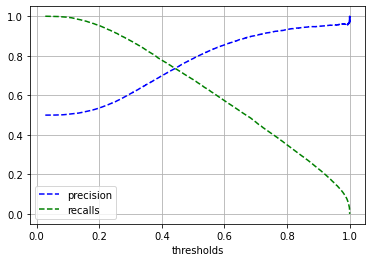

In [267]:
test_p=pd.DataFrame(logit.predict(test_x))
precisions, recalls, thresholds = precision_recall_curve(test_y, test_p)
plt.plot(thresholds, precisions[:-1], "b--", label='precision')
plt.plot(thresholds, recalls[:-1], "g--", label='recalls')
plt.grid()
plt.legend()
plt.xlabel('thresholds')
plt.show()

# Help

정밀도가 0.7 ~ 0.8사이일때 재현율 또한 0.7~0.8사이의 값을 가짐으로 이 정도 구간을 선택하는것이 적절한 trade-off라고 볼 수 있다. 라는 식으로 적어주시면 됩니다.

No handles with labels found to put in legend.


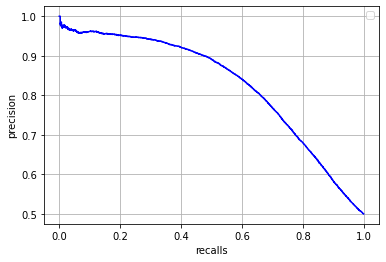

In [268]:
plt.plot(recalls,precisions,'b')
plt.xlabel('recalls')
plt.ylabel('precision')
plt.grid()
plt.legend()
plt.show()

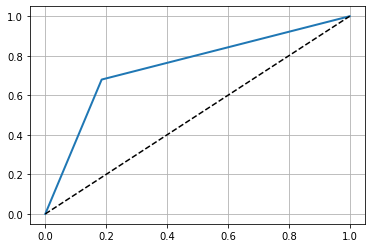

그래프의 면적 : 0.7472482018432137


In [276]:
test_p=pd.DataFrame(logit.predict(test_x))
for val,ind in zip(test_p[0],test_p.index):
  if val < 0.5:
    test_p[0].loc[ind]=0
  else:
    test_p[0].loc[ind]=1
FPR, TPR, thresholds = roc_curve(test_y,test_p)
plt.plot(FPR, TPR,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.grid()
plt.show()
print('그래프의 면적 :',roc_auc_score(test_y,test_p))

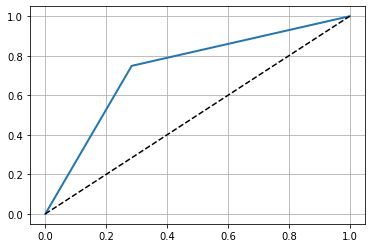

그래프의 면적 : 0.7325987425995129


In [282]:
test_p=pd.DataFrame(logit.predict(test_x))
for val,ind in zip(test_p[0],test_p.index):
  if val < 0.43:
    test_p[0].loc[ind]=0
  else:
    test_p[0].loc[ind]=1
FPR, TPR, thresholds = roc_curve(test_y,test_p)
plt.plot(FPR, TPR,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.grid()
plt.show()
print('그래프의 면적 :',roc_auc_score(test_y,test_p))

# 결과정리(Help)

# Team Review(Help)

# References

# Appendix

로짓모형에서 age6이 통계적으로 유의하지 않게 나와서 age6을 빼고 age7을 넣어봄
= age6이 reference가 된다.

결과는 똑같았다. 그래서 그냥 age7을 기준으로 진행하였다.

In [278]:
df_array=np.array(df)
ct=ColumnTransformer(
    [('encoder',OneHotEncoder(), [1])], remainder='passthrough')
df_array=np.array(ct.fit_transform(df_array))
df_one=pd.DataFrame(df_array)
df_one.columns=['age2','age3','age4','age5','age6','age7','SEX','SBP','DBP','FBS','DIS','BMI']
df_one=df_one.drop(['age6'],axis=1)
df_x=df_one.drop(['DIS'],axis=1)
df_x['intercept']=1
df_y=df_one['DIS']
x_shu=sklearn.utils.shuffle(df_x, random_state=2016251029)
y_shu=sklearn.utils.shuffle(df_y, random_state=2016251029)

data_x,data_y=RandomUnderSampler(random_state=2016251029).fit_resample(x_shu,y_shu)
data_x=pd.DataFrame(data_x)
data_x.columns=df_x.columns
data_y=pd.DataFrame(data_y)
data_y.columns=['DIS']
train_x, test_x, train_y, test_y = train_test_split(data_x,data_y, test_size=0.3,random_state=2016251029)

logit=sm.Logit(train_y,train_x).fit()
logit.summary()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Optimization terminated successfully.
         Current function value: 0.531789
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    DIS   No. Observations:               135116
Model:                          Logit   Df Residuals:                   135105
Method:                           MLE   Df Model:                           10
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                  0.2328
Time:                        10:10:07   Log-Likelihood:                -71853.
converged:                       True   LL-Null:                       -93655.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age2           0.7161      0.103      6.967      0.000       0.515       0.918
age3          -0.0988      0.040     -2.444      0.015      -0.178      -0.020
age4          -0.2866      0.022    -13.032      0.000      -0.330      -0.243
age5          -0.2123      0.017    -12.708      0.000      -0.245      -0.180
age7          -0.0034      0.018     -0.197      0.844      -0.038       0.031
SEX           -0.0324      0.013     -2.479      0.013      -0.058      -0.007
SBP           -0.1176      0.009    -13.091      0.000      -0.135      -0.100
DBP           -0.2732      0.009    -30.023      0.000      -0.291      -0.255
FBS            1.7638      0.012    146.667      0.000       1.740       1.787
BMI           -0.0750      0.007    -11.303      0.000      -0.088      -0.062
intercept      0.1659      0.014     12.278      0.000       0.139       0.192
==============================================================================
"""